**Описание задания:**

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. 

Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

**Этапы работы:**

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

Проведите первичный анализ.

Проверьте данные на пропуски. Удалите в случае обнаружения.

Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Преобразуйте категориальные признаки.

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

Сформулируйте выводы по проделанной работе.

Кратко опишите какие преобразования были сделаны с данными.

Сравните точность двух моделей.

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

**Результат:** получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

**Рекомендации к выполнению:**

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.

Убедитесь, что по ссылкам есть доступ на чтение/просмотр.

Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# Загруза данных

In [ ]:
import pandas as pd

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# EDA

1. Определить наличие пропусков в данных. При наличии заменить средним или самым часто встречаемым значением.
1. Проверить уникальные значения в строковых параметрах на соответствие [заявленным](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html). Заменить некорректные значения.
1. Оценить численные показатели


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Признак workclass

In [ ]:
# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Требует дообработки значение категории "?"



Заполним ? значением моды

In [ ]:
df.workclass = df.workclass.apply(lambda x: 'Private' if x=='?' else x )
df.workclass.value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

## Признак education

In [ ]:
# Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Значения соответствуют заявленным

## Признак marital-status

In [ ]:
# Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Значения соответствуют заявленным

## Признак  occupation

In [ ]:
# Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
# Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Требует дообработки значение категории "?"

У данного значения ярко выраженного значения моды нет, заполним '?' значениями 'Prof-specialty', 'Craft-repair', 'Exec-managerial' случайным образом

In [ ]:
import random

df.occupation = df.occupation.apply(lambda x: random.choice([ 'Prof-specialty', 'Craft-repair', 'Exec-managerial']) if x=='?' else x )
df.occupation.value_counts()

Prof-specialty       7110
Exec-managerial      7039
Craft-repair         7030
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

## Признак relationship

In [ ]:
# Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Значения соответствуют заявленным

## Признак race

In [ ]:
# White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Значения соответствуют заявленным

## Признак gender

In [ ]:
# Female, Male.
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

Значения соответствуют заявленным

## Признак native-country

In [ ]:
# United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, 
# Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, 
# Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
# 41 contries
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Требует дообработки значение категории "?"

Заполним '?' значением моды

In [ ]:
df['native-country'] = df['native-country'].apply(lambda x: 'United-States' if x=='?' else x )
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

## Признак income

In [ ]:
# >50K, <=50K
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## Оценка численных признаков

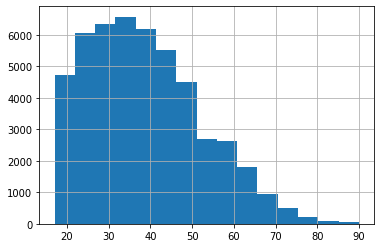

In [ ]:
df['age'].hist(bins=15)

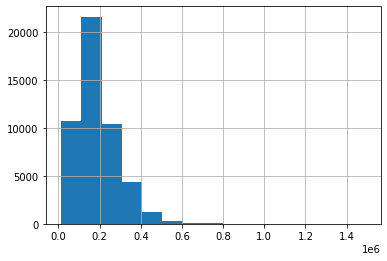

In [ ]:
df['fnlwgt'].hist(bins=15)


У распределения признака fnlwgt наблюдается длинный хвост, который может являться выбросом или же имеет смысл преобразовать признак, например с помощью логорифмирования. Для baseline решения преобразований данных совершать не будем

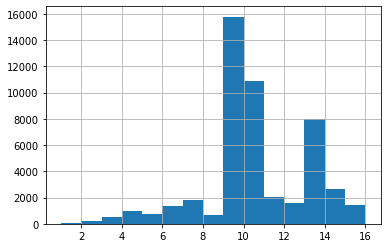

In [ ]:
df['educational-num'].hist(bins=15)

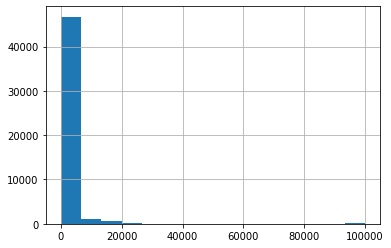

In [ ]:
df['capital-gain'].hist(bins=15)


1. Картина схожа с признаком fnlwgt наблюдается длинный хвост, который может являться выбросом или же имеет смысл преобразовать признак, например с помощью логорифмирования. Для baseline решения преобразований данных совершать не будем
2. Также можно заметить большое количество значений признака равного 0. Имеет смысл проверить выделение отдельного булевого признака выделяющего нулевые значения capital-gain. Для baseline решения преобразований данных совершать не будем

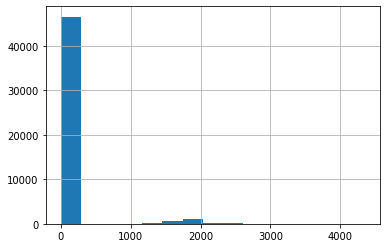

In [ ]:
df['capital-loss'].hist(bins=15)


1. Можно заметить большое количество значений признака равного 0. Имеет смысл проверить выделение отдельного булевого признака выделяющего нулевые значения capital-gain. Для baseline решения преобразований данных совершать не будем


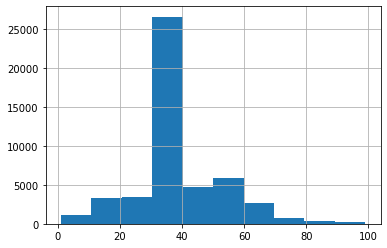

In [ ]:
df['hours-per-week'].hist(bins=10)

# ML

## Feature preparation

In [ ]:
df_ohe = pd.get_dummies (df, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
df_ohe.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df_ohe.drop('income', axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_ohe['income'])
y = pd.Series(le.transform(df_ohe['income']))

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

## Train/test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Lerning models

### SVM

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
svm.score(X_test, y_test) 

0.8568942573446617

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.score(X_test, y_test) 

0.8559729757395844

# Conclusions

В процессе моделирования проводились следующие преобразования данных:
1. Удаление/замена некорректных и отсутствующих данных
1. Преобразование качественных данных с помощью OHE
1. Проведена стандартизация с помощью функции StandardScaler()

Обе модели справились с поставленной задачей схожим образом, метрики оценки качества практически идентичны.

Для улучшения модели имеет смысл проверить гипотезы:

1. Прологарифмировать ряд признаков или убрать часть данных считая их выбросами
1. Дополнить датасет новыми признаками на основе уже имеющихся данных, подчеркивающие особенности того или иного признака.
1. Применить другие модели для обучения или "поиграться" с параметрами применяемых моделей (например проверить svm с разными ядрами)
1. Наблюдается не сбалансированность классов, с этим тоже можно побороться